In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [2]:
# 🔹 Step 1: Load the dataset
df = pd.read_csv("Appointment_dataset.csv")  # Replace with your filename


In [3]:
# 🔹 Step 2: Preprocess
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})



In [4]:
# Optional: Fill or drop missing values
df.dropna(inplace=True)


In [5]:
# 🔹 Step 3: Select features and target
features = ['Age', 'Gender', 'SMS_received', 'Hypertension', 'Diabetes', 'Alcoholism']
X = df[features]
y = df['No-show']



In [6]:
#🔹 Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Step 5: Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Step 6: Train the Decision Tree model on the balanced data
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train_bal, y_train_bal)

# Step 7: Predict on the original test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.692541994631925
Confusion Matrix:
 [[20526  5999]
 [ 4196  2438]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80     26525
           1       0.29      0.37      0.32      6634

    accuracy                           0.69     33159
   macro avg       0.56      0.57      0.56     33159
weighted avg       0.72      0.69      0.71     33159



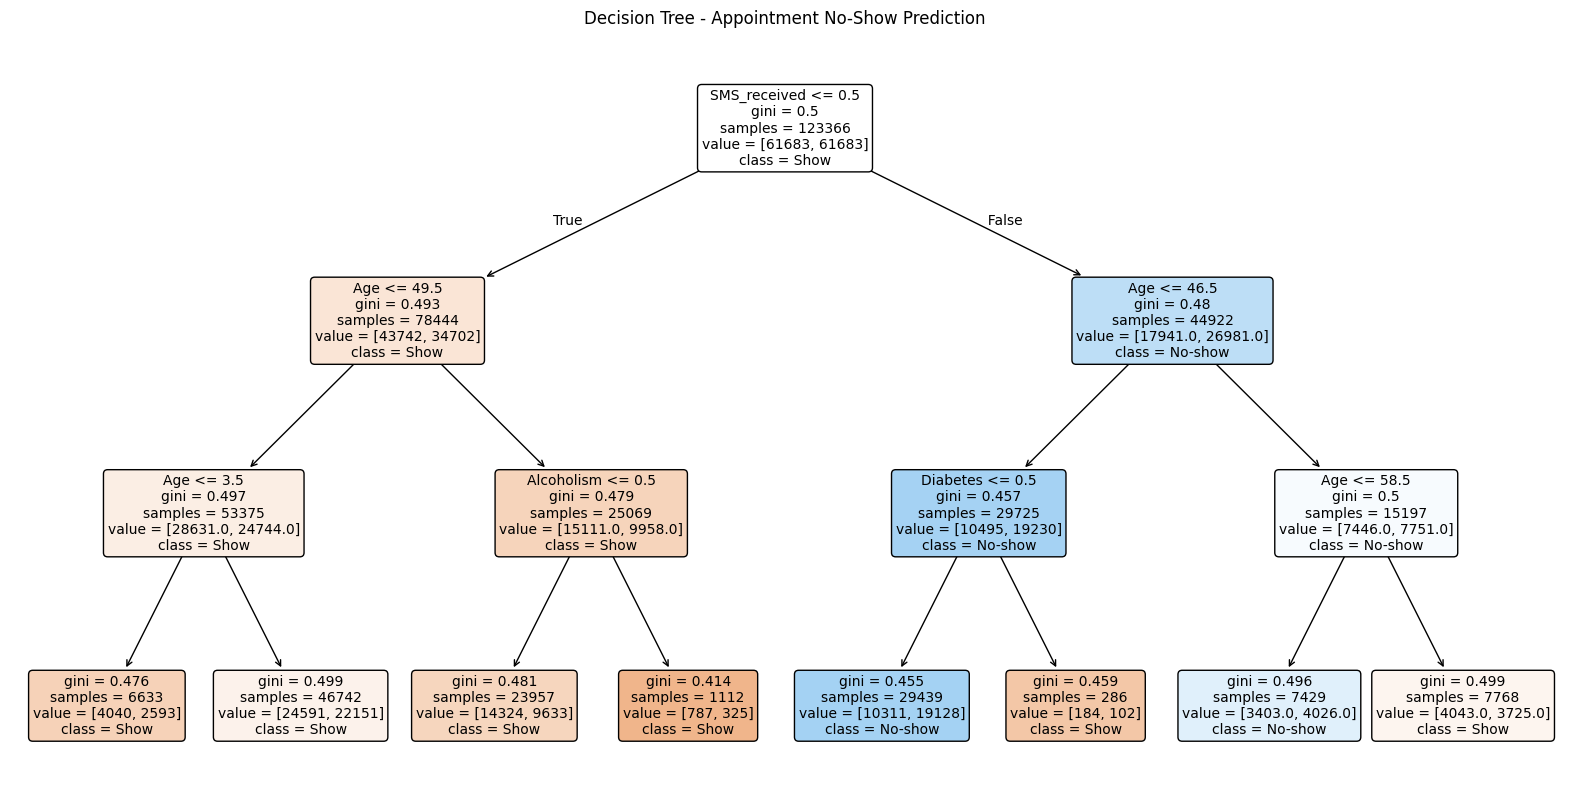

In [8]:
# Set figure size
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(
    model,
    feature_names=X_train.columns,  # use X_train_bal.columns if needed
    class_names=['Show', 'No-show'],  # adjust based on your target classes
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree - Appointment No-Show Prediction")
plt.show()